# Table of Content #

- [Importing Necessary Libraries](#Importing-Necessary-Libraries)
- [Importing October 2018 Flights Data](#Importing-October-2018-Flights-Data)
- [Initial October Data Exploration](#Initial-October-Data-Exploration)
- [Importing November 2018 Flights Data](#Importing-November-2018-Flights-Data)
- [Initial November 2018 Data Exploration](#Initial-November-2018-Data-Exploration)
- [Importing December 2018 Flights Data](#Importing-December-2018-Flights-Data)
- [Initial December 2018 Data Exploration](#Initial-December-2018-Data-Exploration)
- [Q4 Initial Data Exploration](#Q4-Initial-Data-Exploration)

## Importing Necessary Libraries ##

In [1]:
#Importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#Setting style
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#Setting display options
pd.set_option('display.max_columns', 5000)
pd.options.display.max_rows = 4000

## Importing October 2018 Flights Data

In [2]:
#Loading data from a csv file
data_oct = pd.read_csv('~/ga/projects/capstone_data/data/october.csv')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (48,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Checking dataframe's head
data_oct.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,DIV_AIRPORT_LANDINGS,DIV_REACHED_DEST,DIV_ACTUAL_ELAPSED_TIME,DIV_ARR_DELAY,DIV_DISTANCE,DIV1_AIRPORT,DIV1_AIRPORT_ID,DIV1_AIRPORT_SEQ_ID,DIV1_WHEELS_ON,DIV1_TOTAL_GTIME,DIV1_LONGEST_GTIME,DIV1_WHEELS_OFF,DIV1_TAIL_NUM,DIV2_AIRPORT,DIV2_AIRPORT_ID,DIV2_AIRPORT_SEQ_ID,DIV2_WHEELS_ON,DIV2_TOTAL_GTIME,DIV2_LONGEST_GTIME,DIV2_WHEELS_OFF,DIV2_TAIL_NUM,DIV3_AIRPORT,DIV3_AIRPORT_ID,DIV3_AIRPORT_SEQ_ID,DIV3_WHEELS_ON,DIV3_TOTAL_GTIME,DIV3_LONGEST_GTIME,DIV3_WHEELS_OFF,DIV3_TAIL_NUM,DIV4_AIRPORT,DIV4_AIRPORT_ID,DIV4_AIRPORT_SEQ_ID,DIV4_WHEELS_ON,DIV4_TOTAL_GTIME,DIV4_LONGEST_GTIME,DIV4_WHEELS_OFF,DIV4_TAIL_NUM,DIV5_AIRPORT,DIV5_AIRPORT_ID,DIV5_AIRPORT_SEQ_ID,DIV5_WHEELS_ON,DIV5_TOTAL_GTIME,DIV5_LONGEST_GTIME,DIV5_WHEELS_OFF,DIV5_TAIL_NUM,Unnamed: 109
0,2018,4,10,1,1,2018-10-01,WN,19393,WN,N221WN,802,10140,1014005,30140,ABQ,"Albuquerque, NM",NM,35,New Mexico,86,10821,1082106,30852,BWI,"Baltimore, MD",MD,24,Maryland,35,905,903.0,-2.0,0.0,0.0,-1.0,0900-0959,10.0,913.0,1430.0,3.0,1450,1433.0,-17.0,0.0,0.0,-2.0,1400-1459,0.0,NaN,0.0,225.0,210.0,197.0,1.0,1670.0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,4,10,1,1,2018-10-01,WN,19393,WN,N8329B,3744,10140,1014005,30140,ABQ,"Albuquerque, NM",NM,35,New Mexico,86,10821,1082106,30852,BWI,"Baltimore, MD",MD,24,Maryland,35,1500,1458.0,-2.0,0.0,0.0,-1.0,1500-1559,8.0,1506.0,2017.0,3.0,2045,2020.0,-25.0,0.0,0.0,-2.0,2000-2059,0.0,NaN,0.0,225.0,202.0,191.0,1.0,1670.0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,4,10,1,1,2018-10-01,WN,19393,WN,N920WN,1019,10140,1014005,30140,ABQ,"Albuquerque, NM",NM,35,New Mexico,86,11259,1125904,30194,DAL,"Dallas, TX",TX,48,Texas,74,1800,1802.0,2.0,2.0,0.0,0.0,1800-1859,7.0,1809.0,2029.0,3.0,2045,2032.0,-13.0,0.0,0.0,-1.0,2000-2059,0.0,NaN,0.0,105.0,90.0,80.0,1.0,580.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,4,10,1,1,2018-10-01,WN,19393,WN,N480WN,1499,10140,1014005,30140,ABQ,"Albuquerque, NM",NM,35,New Mexico,86,11259,1125904,30194,DAL,"Dallas, TX",TX,48,Texas,74,950,947.0,-3.0,0.0,0.0,-1.0,0900-0959,12.0,959.0,1220.0,3.0,1235,1223.0,-12.0,0.0,0.0,-1.0,1200-1259,0.0,NaN,0.0,105.0,96.0,81.0,1.0,580.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,4,10,1,1,2018-10-01,WN,19393,WN,N227WN,3635,10140,1014005,30140,ABQ,"Albuquerque, NM",NM,35,New Mexico,86,11259,1125904,30194,DAL,"Dallas, TX",TX,48,Texas,74,1150,1151.0,1.0,1.0,0.0,0.0,1100-1159,11.0,1202.0,1422.0,1.0,1430,1423.0,-7.0,0.0,0.0,-1.0,1400-1459,0.0,NaN,0.0,100.0,92.0,80.0,1

## Initial October Data Exploration ##

In [4]:
#Size of data
data_oct.shape

(616101, 110)

In [5]:
#Data in the flight cancellation column
data_oct['CANCELLED'].value_counts()

0.0    611616
1.0      4485
Name: CANCELLED, dtype: int64

In [6]:
#Data in the flight diversion column
data_oct['DIVERTED'].value_counts()

0.0    614819
1.0      1282
Name: DIVERTED, dtype: int64

In [7]:
#Data in FLIGHTS field
data_oct['FLIGHTS'].value_counts() #This field seems uninformative

1.0    616101
Name: FLIGHTS, dtype: int64

In [8]:
#Data in the CARRIER_DELAY field
data_oct['CARRIER_DELAY'].value_counts().head(15) #Field represents carrier delay duration

0.0     54028
1.0      1960
2.0      1889
3.0      1809
6.0      1743
4.0      1734
5.0      1632
7.0      1559
8.0      1419
15.0     1269
9.0      1258
10.0     1156
16.0     1154
11.0     1056
17.0     1043
Name: CARRIER_DELAY, dtype: int64

In [9]:
#Data in DIV_AIRPORT_LANDINGS field
data_oct['DIV_AIRPORT_LANDINGS'].value_counts() #Number of actual diversions, raises questions for 9 diversions(!)

0    614762
1      1270
9        57
2        12
Name: DIV_AIRPORT_LANDINGS, dtype: int64

In [10]:
#Diverted flights actually reaching their destination airport
data_oct['DIV_REACHED_DEST'].value_counts()

1.0    1137
0.0     145
Name: DIV_REACHED_DEST, dtype: int64

In [11]:
#Arrival delay exceeding 15 minutes to scheduled arrival time
data_oct['ARR_DEL15'].value_counts()

0.0    508677
1.0    101657
Name: ARR_DEL15, dtype: int64

This field is very important as, accoring to accepted industry standards, a "True Delay" is when flight's arrival time exceeds its scheduled arrival time by 15 or more minutes. 

39.82% of flights were delayed more than 15 minutes in October 2018


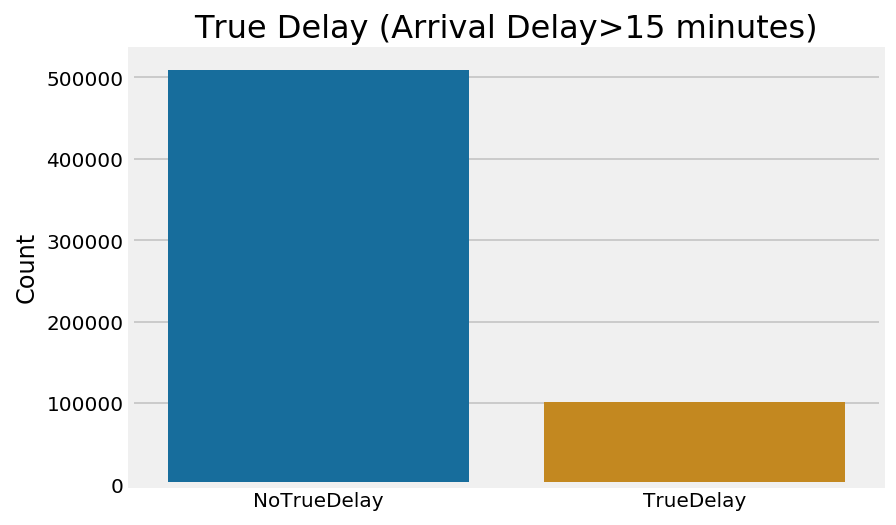

In [12]:
#Defining a function for TrueDelay barchart
def true_delay_chart(data_month):  
    sns.barplot(x=['NoTrueDelay','TrueDelay'],y=data_month.value_counts(), palette='colorblind');
    plt.title("True Delay (Arrival Delay>15 minutes)", fontsize=16)
    plt.ylabel("Count", fontsize=12);
    return None

#Plotting a barchart of True Delays for October 2018
true_delay_chart(data_oct['ARR_DEL15']);
print(f"{round(data_oct[abs(data_oct['ARR_DELAY']) >= 15].shape[0]/data_oct.shape[0]*100,2)}% of flights were delayed more than 15 minutes in October 2018")

## Importing November 2018 Flights Data ##

In [13]:
#Loading November 2018 data from a csv file
data_nov = pd.read_csv('~/ga/projects/capstone_data/data/november.csv')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (48,69,76,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Initial November 2018 Data Exploration ##

In [14]:
#Size of November data
data_nov.shape

(586178, 110)

41.72% of flights were delayed more than 15 minutes in November 2018


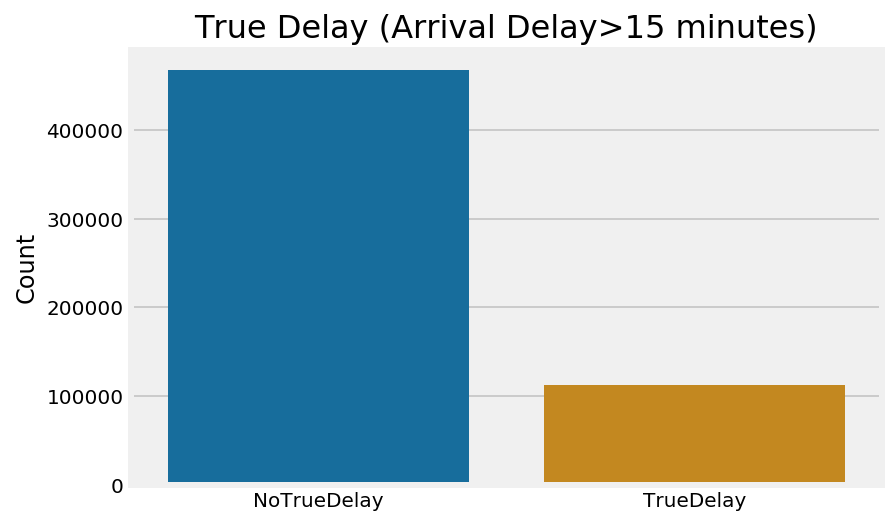

In [15]:
#Plotting a barchart of True Delays for November 2018
true_delay_chart(data_nov['ARR_DEL15']);
print(f"{round(data_nov[abs(data_nov['ARR_DELAY']) >= 15].shape[0]/data_nov.shape[0]*100,2)}% of flights were delayed more than 15 minutes in November 2018")

## Importing December 2018 Flights Data ##

In [16]:
#Loading December 2018 data from a csv file
data_dec = pd.read_csv('~/ga/projects/capstone_data/data/december.csv')

## Initial December 2018 Data Exploration ##

In [17]:
#Size of data
data_dec.shape

(593842, 110)

44.8% of flights were delayed more than 15 minutes in December 2018


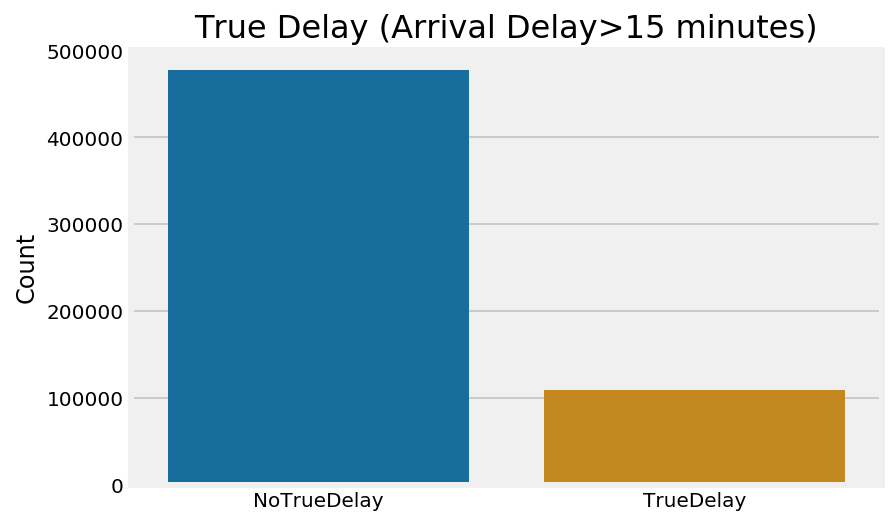

In [18]:
#Plotting a barchart of True Delays for December 2018
true_delay_chart(data_dec['ARR_DEL15']);
print(f"{round(data_dec[abs(data_dec['ARR_DELAY']) >= 15].shape[0]/data_dec.shape[0]*100,2)}% of flights were delayed more than 15 minutes in December 2018")

## Q4 Initial Data Exploration ##

In [19]:
#Size of Q4 2018 data
data_oct.shape[0]+data_nov.shape[0]+data_dec.shape[0]

1796121

In [20]:
#Concatenating 3 DataFrames for Q4
delays = pd.concat([data_oct,data_nov,data_dec])

In [21]:
#Size check
delays.shape

(1796121, 110)

42.09% of flights were delayed more than 15 minutes in Q4 2018


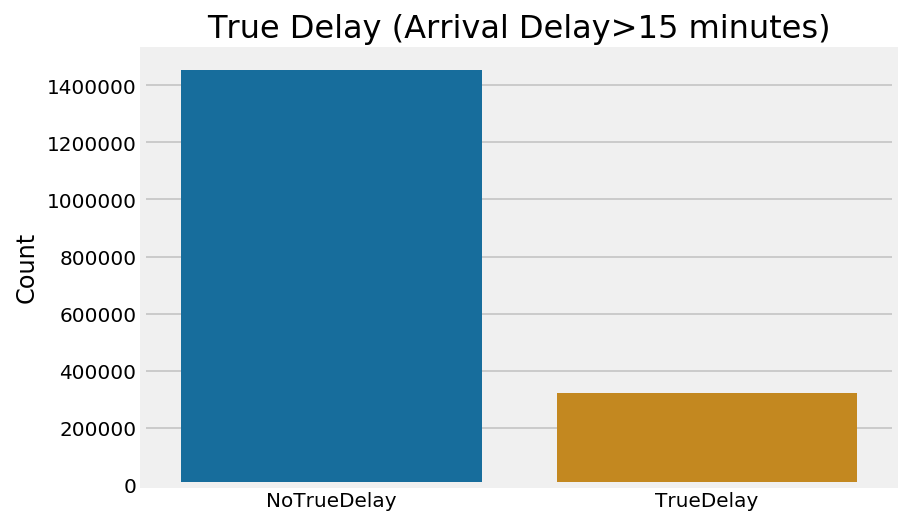

In [22]:
#Plotting a barchart of True Delays for Q4 2018
true_delay_chart(delays['ARR_DEL15']);
print(f"{round(delays[abs(delays['ARR_DELAY']) >= 15].shape[0]/delays.shape[0]*100,2)}% of flights were delayed more than 15 minutes in Q4 2018")

In [ ]:
#Saving dataframe with Q4 flights information to a csv file
delays.to_csv('~/ga/projects/capstone_data/data/delaysQ4_2018.csv')